# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech
- Nama: Muhammad Acqmal Fadhilla Latief
- Email: belajarsupayajago@gmail.com
- Id Dicoding: Muhammad Acqmal Fadhilla Latief

# Persiapan

## Menyiapkan library yang dibutuhkan

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from pickle import dump

Menyiapkan data yang akan digunakan

In [2]:
url = "https://github.com/dicodingacademy/dicoding_dataset/blob/main/employee/employee_data.csv?raw=true"
df = pd.read_csv(url)
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


# Data understanding

## information data

#### Insight data

is got 34 columns as follows:

* **EmployeeId** - Employee Identifier
* **Attrition** - Did the employee attrition? (0=no, 1=yes)
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Daily salary
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Hourly salary
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly salary
* **MonthlyRate** - Mounthly rate
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

## Assessing data

### Check many data

In [3]:
print(f"many data:{len(df)}")

many data:1470


### Check type data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

#### Insight
Is got anomalie data type which must isn't happened
* **EmployeeID** - string


### Check missing value

In [5]:
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

#### Insight
Obtained 412 null data in the Attrition column

### Check duplicate data

In [6]:
df.duplicated().sum()

0

#### Insight
Is not got duplicate data

### Check value unique

In [7]:
print(df["BusinessTravel"].value_counts())

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


In [8]:
print(df["Department"].value_counts())

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


In [9]:
print(df["EducationField"].value_counts())

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


In [10]:
print(df["Gender"].value_counts())

Gender
Male      882
Female    588
Name: count, dtype: int64


In [11]:
print(df["JobRole"].value_counts())

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


In [12]:
print(df["MaritalStatus"].value_counts())

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


In [13]:
print(df["Over18"].value_counts())

Over18
Y    1470
Name: count, dtype: int64


In [14]:
print(df["OverTime"].value_counts())

OverTime
No     1054
Yes     416
Name: count, dtype: int64


#### Insight
all columns categorical will be changed into numerical
* **BusinessTravel**
* **Departement**
* **EducationField**
* **Gender**
* **JobRole**
* **MaritalStatus**
* **Over18**
* **OverTime**

## Cleaning data

### To change type date
change type data to column which has been done assessing data

In [15]:
df["EmployeeId"] = df["EmployeeId"].astype(str)


### To change columns categorical to numeric
changing columns categorical faceilitate for getting feature

In [16]:
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


In [17]:
df_exp = df.copy()
# df_exp.drop("EmployeId", axis=1, inplace=True)

for column in df_exp.columns:
    if column != "EmployeeId":
        if df_exp[column].dtype == "object":
            df_exp[column] = df_exp[column].astype("category")
            df_exp[column] = df_exp[column].cat.codes

In [18]:
df_exp.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,1,1444,0,1,4,4,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,2,1141,1,11,2,3,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,2,1323,1,4,4,1,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,1,555,2,26,3,2,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,2,1194,1,2,4,3,1,...,2,80,3,20,2,3,5,3,0,2


In [19]:
print(df_exp["BusinessTravel"].value_counts())

BusinessTravel
2    1043
1     277
0     150
Name: count, dtype: int64


In [20]:
print(df_exp["Department"].value_counts())

Department
1    961
2    446
0     63
Name: count, dtype: int64


In [21]:
print(df_exp["EducationField"].value_counts())

EducationField
1    606
3    464
2    159
5    132
4     82
0     27
Name: count, dtype: int64


In [22]:
print(df_exp["Gender"].value_counts())

Gender
1    882
0    588
Name: count, dtype: int64


In [23]:
print(df_exp["JobRole"].value_counts())

JobRole
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: count, dtype: int64


In [24]:
print(df_exp["MaritalStatus"].value_counts())

MaritalStatus
1    673
2    470
0    327
Name: count, dtype: int64


In [25]:
print(df_exp["Over18"].value_counts())

Over18
0    1470
Name: count, dtype: int64


In [26]:
print(df_exp["OverTime"].value_counts())

OverTime
0    1054
1     416
Name: count, dtype: int64


#### Insight
explaining columns which are done changing:
1. BusinessTravel - 0-Non-Travel, 1-Travel_Frequently, 2-Travel_Rarely
2. Department - 0-Human Resources, 1-Research & Development, 2-sales
3. EducationField - 0-Human Resources, 1-Life Sciences, 2-Marketing, 3-Medical, 4-Other, 5-Technical Degree
4. Gender - 0-Female, 1-Male
5. JobRole - 0-Healthcare Representative, 1-Human Resource, 2-Laboratory Technician, 3-Manager, 4-Manufacuring Director,5-Research Director, 6-Research Scientist, 7-Sales Excutive, 8-Sales Representative
6. MaritalStatus - 0-Divorced, 1-Married, 2-single
7. Over18 - 0-Y, 1-N
8. OverTime - 0-No, 1-Yes



### To handle Missing values
because missing values is big which is not possible for dropping data, but there are many method for handling missing values which we will use one of method for it

In [27]:
not_missing = df_exp[df_exp["Attrition"].notnull()]
missing = df_exp[df_exp["Attrition"].isnull()]

# drop columns over because we don't need
not_missing = not_missing.drop(columns=["Over18", "EmployeeCount", "StandardHours"], axis=1)
missing = missing.drop(columns=["Over18", "EmployeeCount", "StandardHours"], axis=1)

In [28]:
not_missing["Attrition"].value_counts()

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

In [29]:
attrition_zero_df = not_missing[not_missing["Attrition"] == 0].sample(n=179, random_state=42)
attrition_one_df = not_missing[not_missing["Attrition"] == 1].sample(n=179, random_state=42)

df_missing = pd.concat([attrition_zero_df, attrition_one_df])

In [30]:
print(df_missing["Attrition"].value_counts())

Attrition
0.0    179
1.0    179
Name: count, dtype: int64


In [31]:
# initialize
scaler = StandardScaler()
x = df_missing.drop("Attrition", axis=1)
y = df_missing["Attrition"]

# Standarization feature
X = scaler.fit_transform(x)

model_random = RandomForestClassifier(n_estimators=100, random_state=42)
model_random.fit(X, y)
print(f"score accuracy:{model_random.score(X, y) * 100:.2f}%")


score accuracy:100.00%


In [32]:
# predict missing value
predicted = model_random.predict(missing.drop("Attrition", axis=1))

# fill in missing value
df_exp.loc[df_exp['Attrition'].isnull(), 'Attrition'] = predicted

/Users/acqmallatief/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [33]:
print(df_exp["Attrition"].value_counts())

Attrition
0.0    971
1.0    499
Name: count, dtype: int64


In [34]:
print(df_exp.isnull().sum())

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Insight
with using method predictive imputation is expected capable handling problem missing value well

# Data Exploratory

1. Do certain age groups have higher attrition rates?
2. How do attrition rates vary by gender?
3. Which department has the highest attrition rate?
4. Are attrition rates higher among employees with lower salaries?
5. How long does the average employee stay at a company before they experience attrition?
6. How attrition rates vary based on salary increases or bonuses
7. How is attrition rate affected by average work hours?
8. Does the married group have a higher attrition rate?
9. How can we predict which employees will potentially leave in the future?


In [35]:
df_exp.drop(columns=["Over18", "EmployeeCount", "StandardHours"], axis=1, inplace=True)

In [36]:
df_exp.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,0.0,1,1444,0,1,4,4,4,...,3,2,1,7,2,3,6,2,1,2
1,2,37,1.0,2,1141,1,11,2,3,1,...,3,1,0,15,2,1,1,0,0,0
2,3,51,1.0,2,1323,1,4,4,1,1,...,3,3,3,18,2,4,10,0,2,7
3,4,42,0.0,1,555,2,26,3,2,3,...,3,4,1,23,2,4,20,4,4,8
4,5,40,0.0,2,1194,1,2,4,3,3,...,3,2,3,20,2,3,5,3,0,2


In [37]:
df_exp.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.339456,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.473686,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Apakah kelompok umur tertentu memiliki tingkat attrition yang lebih tinggi?

In [38]:
def categorize_age(age):
    if 15 <= age <= 24:
        return "Young Age"
    elif 25 <= age <= 34:
        return "Early worker age"
    elif 35 <= age <= 44:
        return "Middle Age"
    elif 45 <= age <= 54:
        return "Pre-retirement Age"
    elif age >= 55:
        return "Retirement Age"
    else:
        return "Other Age Group"

df_exp["AgeGroup"] = df_exp["Age"].apply(categorize_age)

df_age_grouped = df_exp.groupby("AgeGroup").agg(
    Attrition_0=("Attrition", lambda x: (x == 0).sum()),  # Hitung jumlah Attrition == 0
    Attrition_1=("Attrition", lambda x: (x == 1).sum()),  # Hitung jumlah Attrition == 1
    ).reset_index()
df_age_grouped

,AgeGroup,Attrition_0,Attrition_1
0,Early worker age,357,197
1,Middle Age,337,168
2,Pre-retirement Age,171,74
3,Retirement Age,50,19
4,Young Age,56,41


In [39]:
df_age_count = df_exp.groupby("AgeGroup").agg({"AgeGroup": "count"})
df_age_count.rename(columns={"AgeGroup": "Count"}, inplace=True)

df_age = pd.merge(df_age_count, df_age_grouped, on="AgeGroup", how="left")
df_age

,AgeGroup,Count,Attrition_0,Attrition_1
0,Early worker age,554,357,197
1,Middle Age,505,337,168
2,Pre-retirement Age,245,171,74
3,Retirement Age,69,50,19
4,Young Age,97,56,41


In [40]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AgeGroup     5 non-null      object
 1   Count        5 non-null      int64 
 2   Attrition_0  5 non-null      int64 
 3   Attrition_1  5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


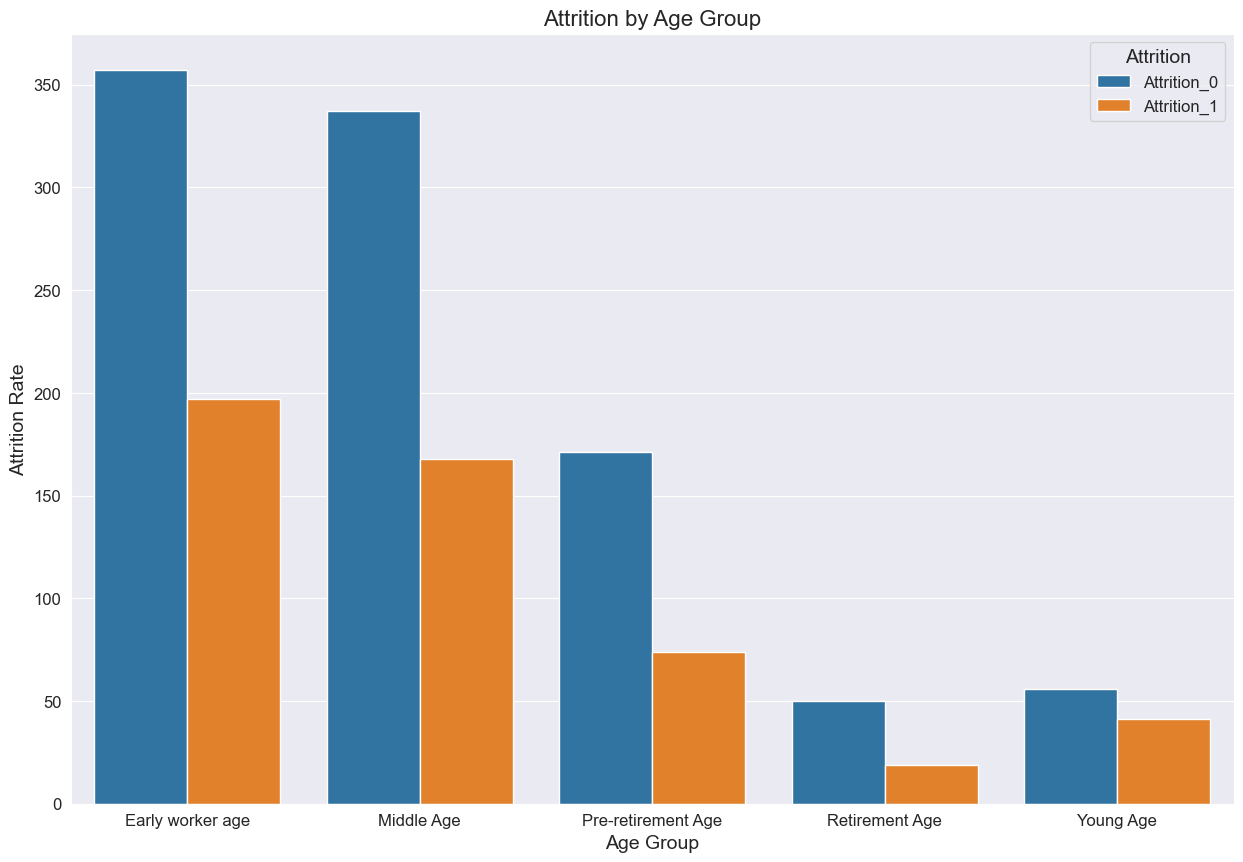

In [41]:
df_age_melted = df_age.melt(id_vars="AgeGroup",
                            value_vars=["Attrition_0", "Attrition_1"],
                            var_name="Attrition",
                            value_name="Value")

# Plot dengan hue
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="AgeGroup", y="Value", hue="Attrition", data=df_age_melted, ax=ax)
ax.set_title("Attrition by Age Group", fontsize=16)
ax.set_xlabel("Age Group", fontsize=14)
ax.set_ylabel("Attrition Rate", fontsize=14)
ax.legend(title="Attrition", fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#### Insight
From the analysis, it is observed that employees in the early-career age group and middle-aged group tend to have higher attrition rates compared to other age groups. This indicates that younger employees and those in their mid-career stages might face challenges or dissatisfaction that leads them to leave the organization.

## Bagaimana tingkat attrition bervariasi berdasarkan gender?

In [42]:
df_gender = df_exp.groupby("Gender").agg(
    Attrition_0=("Attrition", lambda x: (x == 0).sum()),
    Attrition_1=("Attrition", lambda x: (x == 1).sum())
).reset_index()

df_gender

,Gender,Attrition_0,Attrition_1
0,0,393,195
1,1,578,304


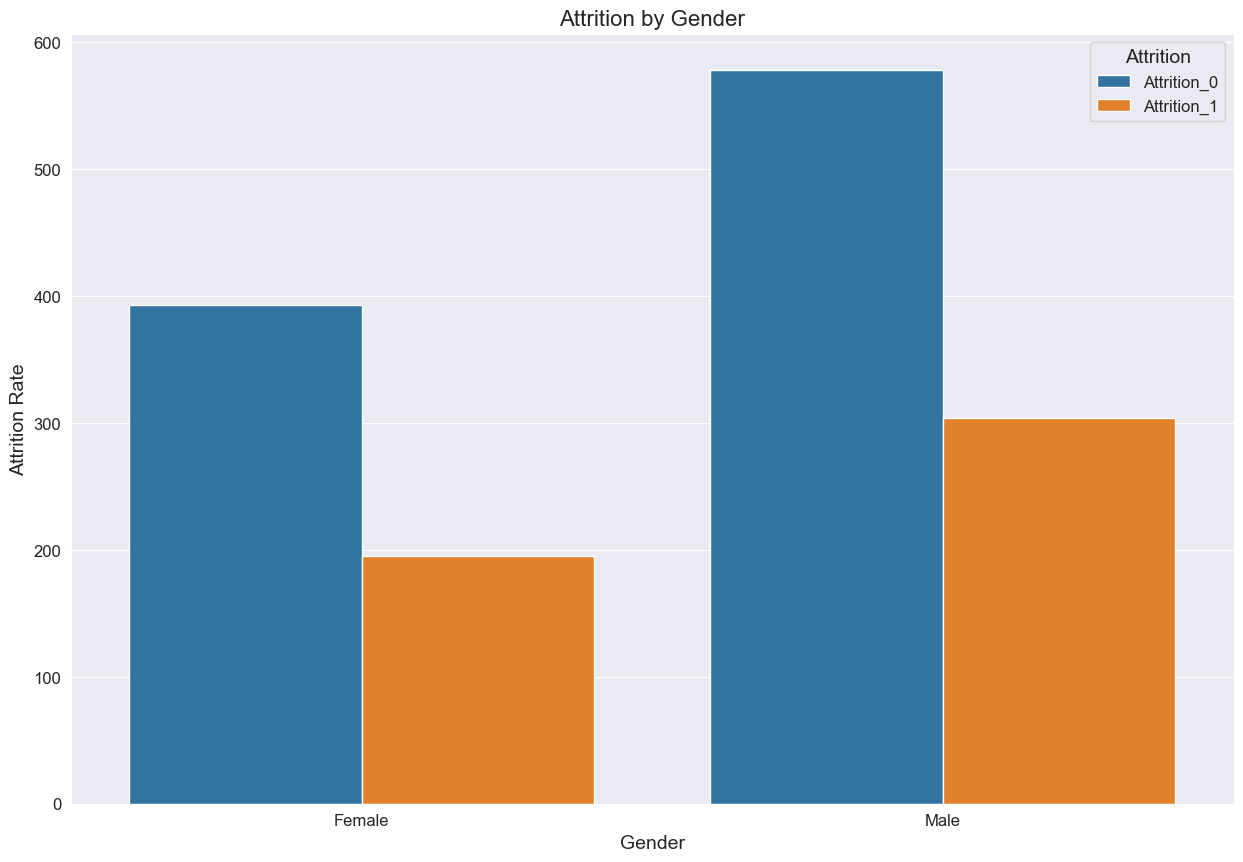

In [43]:
df_gender_melted = df_gender.melt(id_vars="Gender",
                                  value_vars=["Attrition_0", "Attrition_1"],
                                  var_name="Attrition",
                                  value_name="Value")

df_gender_melted.replace({"Gender": {0: "Female", 1: "Male"}}, inplace=True)

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="Gender", y="Value", hue="Attrition", data=df_gender_melted, ax=ax)
ax.set_title("Attrition by Gender", fontsize=16)
ax.set_xlabel("Gender", fontsize=14)
ax.set_ylabel("Attrition Rate", fontsize=14)
ax.legend(title="Attrition", fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

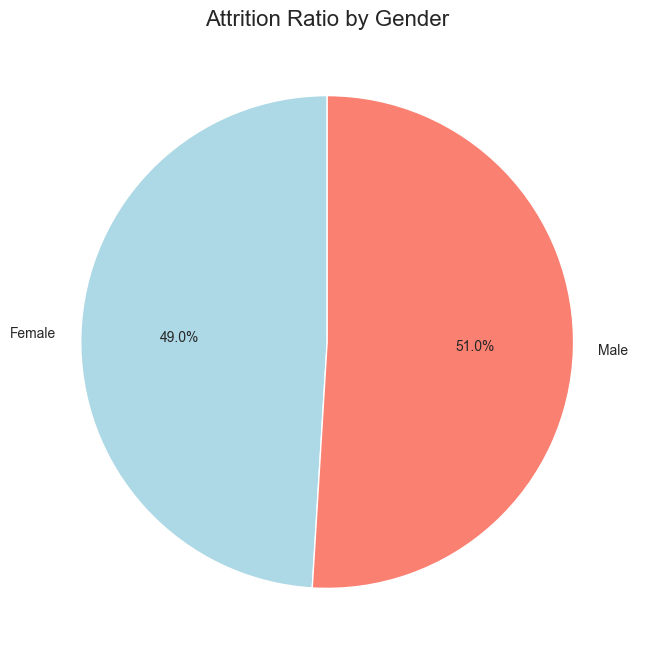

In [44]:
# count of the employees amount and attrition base on gender
df_gender_ratio = df_gender.copy()
df_gender_ratio["Total"] = df_gender_ratio["Attrition_0"] + df_gender_ratio["Attrition_1"]
df_gender_ratio["Attrition_Ratio"] = df_gender_ratio["Attrition_1"] / df_gender_ratio["Total"]

# Mapping gender labels
df_gender_ratio["Gender"] = df_gender_ratio["Gender"].replace({0: "Female", 1: "Male"})

# Visualisasi Rasio Attrition
gender_labels = df_gender_ratio["Gender"]
attrition_ratios = df_gender_ratio["Attrition_Ratio"]

# Pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(attrition_ratios, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=["lightblue", "salmon"])
ax.set_title("Attrition Ratio by Gender", fontsize=16)
plt.show()

### Insight
The data shows that male employees have a higher attrition rate compared to female employees. This indicates that male employees may face different challenges or dissatisfaction leading to their departure

In [45]:
df_gender_ratio.to_csv("data/df_gender_ratio.csv", index=False)

## Departemen mana yang memiliki tingkat attrition tertinggi?

In [46]:
df_exp.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.339456,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.473686,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [47]:
df_department = df_exp.groupby("Department").agg(
    Attrition_0=("Attrition", lambda x: (x == 0).sum()),
    Attrition_1=("Attrition", lambda x: (x == 1).sum()),
    Dailyrate=("DailyRate", "mean"),
    Monthlyrate=("MonthlyRate", "mean"),
    YearsAtCompany=("YearsAtCompany", "mean"),
    TotalWorkingYears=("TotalWorkingYears", "mean"),
    OverTime=("OverTime", "mean"),
).reset_index()

df_department


,Department,Attrition_0,Attrition_1,Dailyrate,Monthlyrate,YearsAtCompany,TotalWorkingYears,OverTime
0,0,39,24,751.539683,13492.984127,7.238095,11.555556,0.269841
1,1,645,316,806.851197,14284.865765,6.864724,11.342352,0.281998
2,2,287,159,800.275785,14489.793722,7.284753,11.105381,0.286996


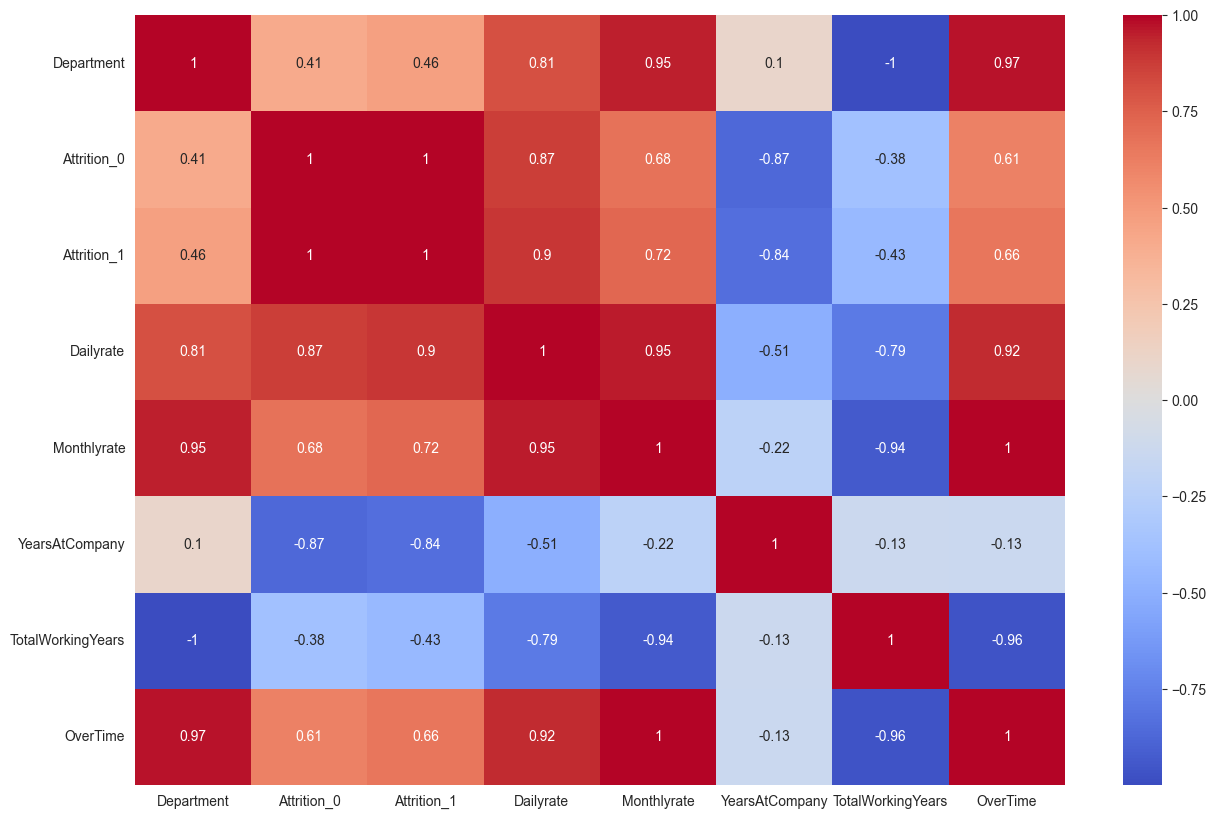

In [48]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_department.corr(numeric_only=True), annot=True, cmap="coolwarm", ax=ax)
plt.show()

#### Insight
The data shows that there is no significant correlation between Years at Company and Total Working Years with the decision to leave (attrition). This suggests that the length of tenure or overall career experience does not strongly influence employees' decisions to stay or leave the organization.

In [49]:
df_department.replace({"Department" :{0 : "Human Resource", 1 : "Research & Development", 2 : "sales"}}, inplace=True)
df_department.drop(columns=["YearsAtCompany", "TotalWorkingYears"], inplace=True)

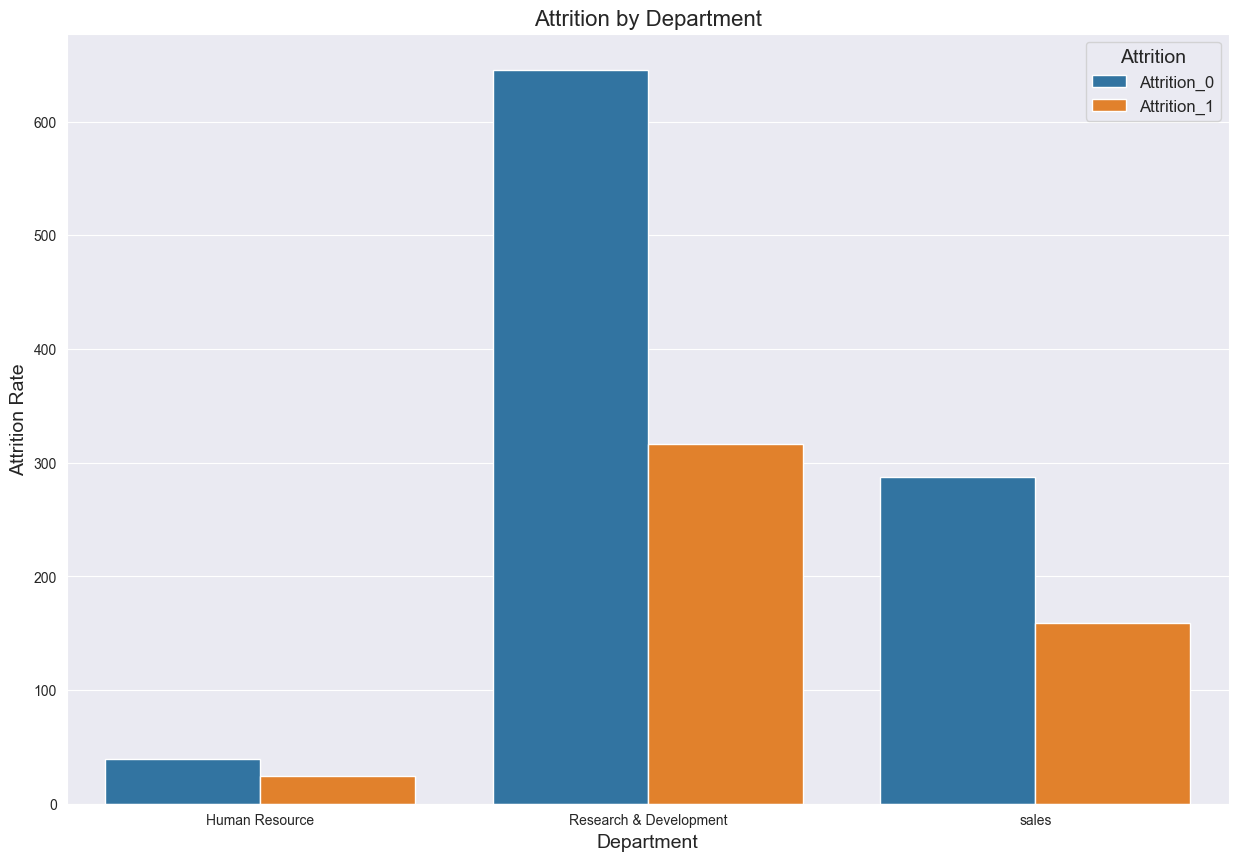

In [50]:
df_department_melted = df_department.melt(id_vars="Department",
                                          value_vars=["Attrition_0", "Attrition_1"],
                                          var_name="Attrition",
                                          value_name="Value")

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="Department", y="Value", hue="Attrition", data=df_department_melted, ax=ax)
ax.set_title("Attrition by Department", fontsize=16)
ax.set_xlabel("Department", fontsize=14)
ax.set_ylabel("Attrition Rate", fontsize=14)
ax.legend(title="Attrition", fontsize=12, title_fontsize=14)
plt.show()

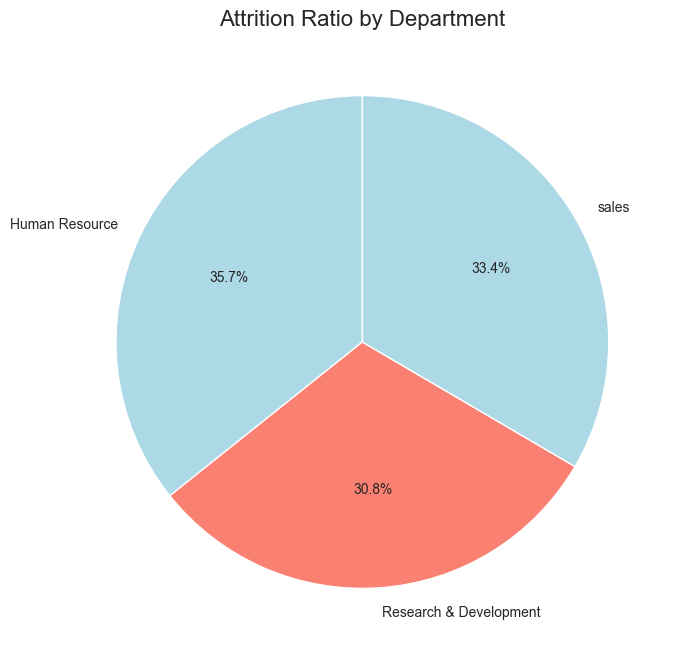

In [51]:
# count of the employees amount each department and attrition base on department
df_department_ratio = df_department.copy()
df_department_ratio["Total"] = df_department_ratio["Attrition_0"] + df_department_ratio["Attrition_1"]
df_department_ratio["Attrition_Ratio"] = df_department_ratio["Attrition_1"] / df_department_ratio["Total"]

# Mapping department
df_department_ratio["Department"] = df_department_ratio["Department"].replace({0: "Human Resource", 1: "Research & Development", 2: "sales"})

# Visualisasi Ratio Attrition
department_labels = df_department_ratio["Department"]
attrition_ratios = df_department_ratio["Attrition_Ratio"]

# Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(attrition_ratios, labels=department_labels, autopct='%1.1f%%', startangle=90, colors=["lightblue", "salmon"])
ax.set_title("Attrition Ratio by Department", fontsize=16)
plt.show()



#### Insight
The data shows that the Research & Development department has slightly lower attrition compared to the Human Resources and Sales departments. However, the differences are relatively small.

In [52]:
df_department_ratio.to_csv("data/df_department_ratio.csv", index=False)

## Apakah tingkat attrition lebih tinggi di antara karyawan dengan gaji lebih rendah?

In [53]:
df_exp["MonthlyIncome"].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<Axes: >

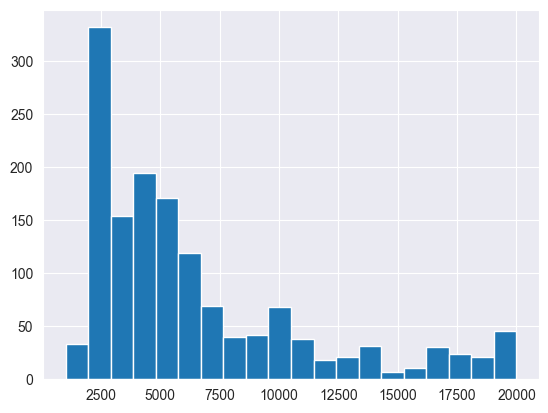

In [54]:
df_exp["MonthlyIncome"].hist(bins=20)

In [55]:
df_exp["Attrition"].value_counts()

Attrition
0.0    971
1.0    499
Name: count, dtype: int64

In [56]:
def categorize_salary(salary):
    if salary <= 7500:
        return "Low Salary"
    elif salary <= 15000:
        return "Medium Salary"
    else:
        return "High Salary"


df_exp["SalaryGroup"] = df_exp["MonthlyIncome"].apply(categorize_salary)
df_salary_grouped = df_exp.groupby("SalaryGroup").agg(
    Attrition_0=("Attrition", lambda x: (x == 0).sum()),
    Attrition_1=("Attrition", lambda x: (x == 1).sum()),
    TotalWorkingYears=("TotalWorkingYears", "mean"),
).reset_index()

df_salary_grouped

,SalaryGroup,Attrition_0,Attrition_1,TotalWorkingYears
0,High Salary,102,31,25.601504
1,Low Salary,684,375,8.200189
2,Medium Salary,185,93,16.158273


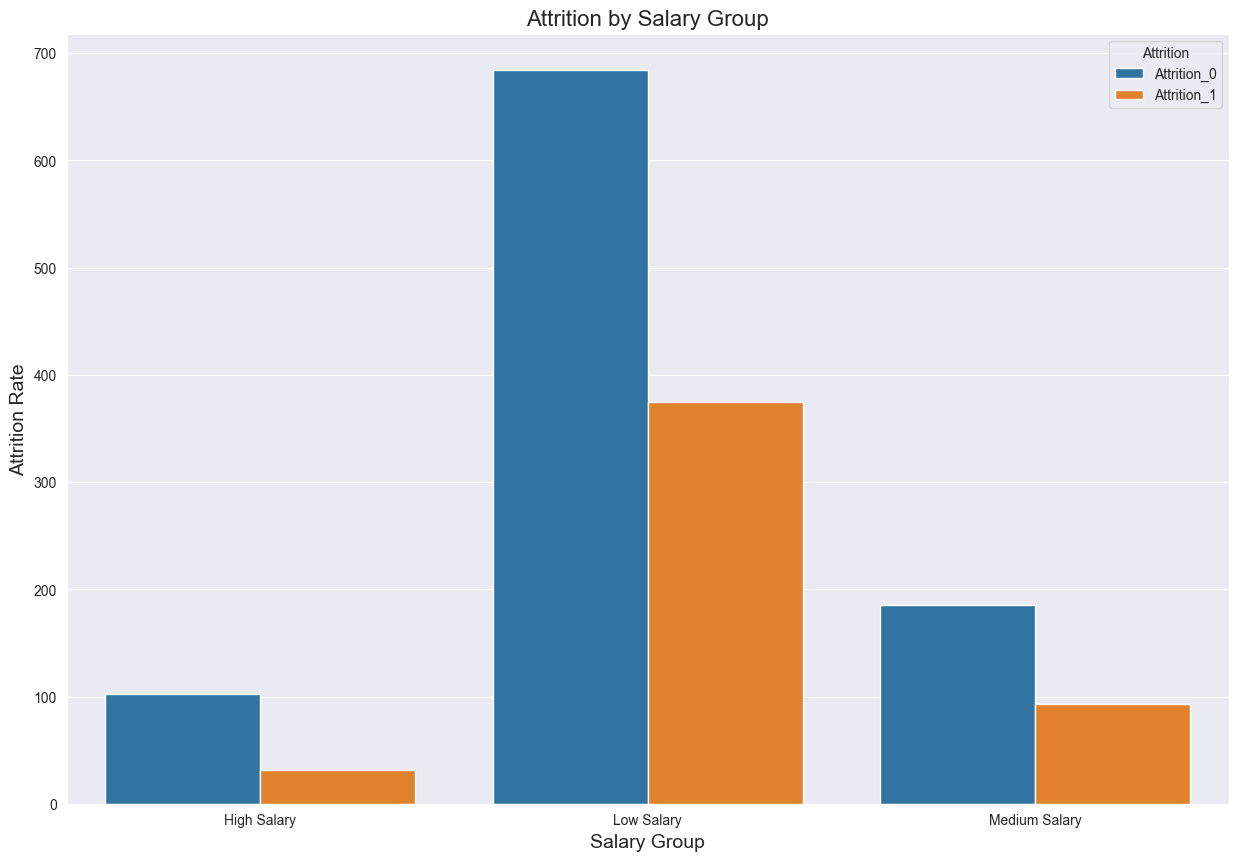

In [57]:
df_salary_melted = df_salary_grouped.melt(id_vars="SalaryGroup",
                                          value_vars=["Attrition_0", "Attrition_1"],
                                          var_name="Attrition",
                                          value_name="Value")

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="SalaryGroup", y="Value", hue="Attrition", data=df_salary_melted, ax=ax)
ax.set_title("Attrition by Salary Group", fontsize=16)
ax.set_xlabel("Salary Group", fontsize=14)
ax.set_ylabel("Attrition Rate", fontsize=14)
plt.show()

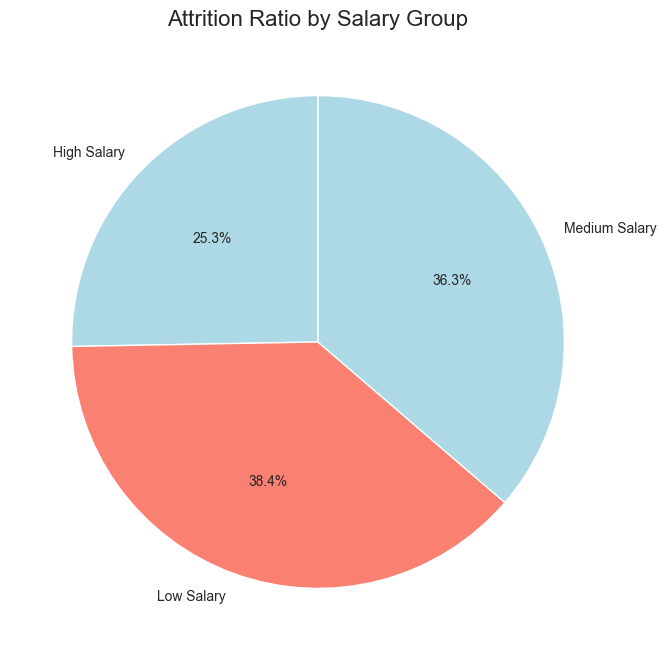

In [58]:
# Count of group salary and attrition base on group salary
df_salary_ratio = df_salary_grouped.copy()
df_salary_ratio["Total"] = df_salary_ratio["Attrition_0"] + df_salary_ratio["Attrition_1"]
df_salary_ratio["Attrition_Ratio"] = df_salary_ratio["Attrition_1"] / df_salary_ratio["Total"]

# Visualisasi ratio attrition
salary_labels = df_salary_ratio["SalaryGroup"]
attrition_ratios = df_salary_ratio["Attrition_Ratio"]

# Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(attrition_ratios, labels=salary_labels, autopct='%1.1f%%', startangle=90, colors=["lightblue", "salmon"])
ax.set_title("Attrition Ratio by Salary Group", fontsize=16)
plt.show()

#### Insight
The data indicates that employees with low salaries have a higher likelihood of leaving (attrition) compared to those with medium or high salaries.

In [59]:
df_salary_ratio.to_csv("data/df_salary_ratio.csv", index=False)

## Berapa lama rata-rata karyawan bertahan di perusahaan sebelum mereka mengalami attrition?

In [60]:
df_exp["YearsAtCompany"].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

<Axes: >

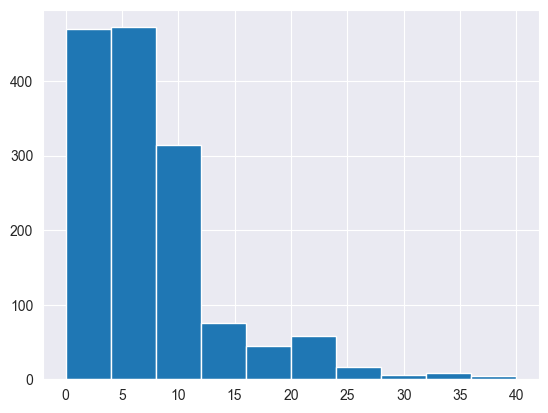

In [61]:
df_exp["YearsAtCompany"].hist(bins=10)

In [62]:
df_exp["TotalWorkingYears"].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

<Axes: >

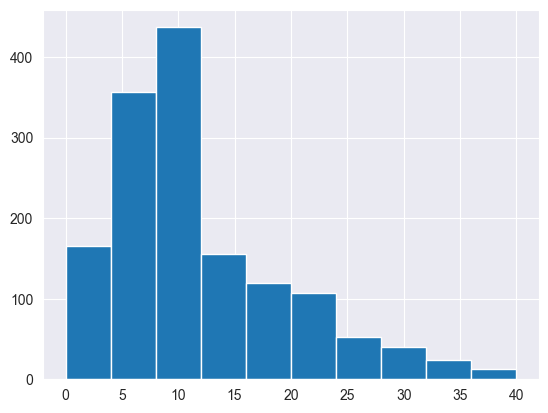

In [63]:
df_exp["TotalWorkingYears"].hist(bins=10)

In [64]:
def categorize_experience(years):
    if years <= 1:
        return "Fresh Graduate"
    elif years <= 3:
        return "Junior Employee"
    elif years <= 5:
        return "Mid-level Employee"
    else:
        return "Senior Employee"

def categorize_stay(stay):
    if stay <= 5:
        return "Short Stay"
    elif stay <= 10:
        return "Medium Stay"
    else:
        return "Long Stay"

df_exp["StayGroup"] = df_exp["YearsAtCompany"].apply(categorize_stay)
df_exp["ExperienceGroup"] = df_exp["TotalWorkingYears"].apply(categorize_experience)

In [65]:
df_stay_grouped = df_exp.groupby("StayGroup").agg(
    Attrition_0=("Attrition", lambda x: (x == 0).sum()),
    Attrition_1=("Attrition", lambda x: (x == 1).sum()),
    TotalWorkingYears=("TotalWorkingYears", "mean"),
).reset_index()

df_stay_grouped

,StayGroup,Attrition_0,Attrition_1,TotalWorkingYears
0,Long Stay,168,78,20.243902
1,Medium Stay,298,150,11.486607
2,Short Stay,505,271,8.318299


In [66]:
df_experience_grouped = df_exp.groupby("ExperienceGroup").agg(
    Attrition_0=("Attrition", lambda x: (x == 0).sum()),
    Attrition_1=("Attrition", lambda x: (x == 1).sum()),
    YearsAtCompany=("YearsAtCompany", "mean"),
).reset_index()

df_experience_grouped

,ExperienceGroup,Attrition_0,Attrition_1,YearsAtCompany
0,Fresh Graduate,60,32,0.836957
1,Junior Employee,53,20,2.123288
2,Mid-level Employee,96,55,3.423841
3,Senior Employee,762,392,8.278163


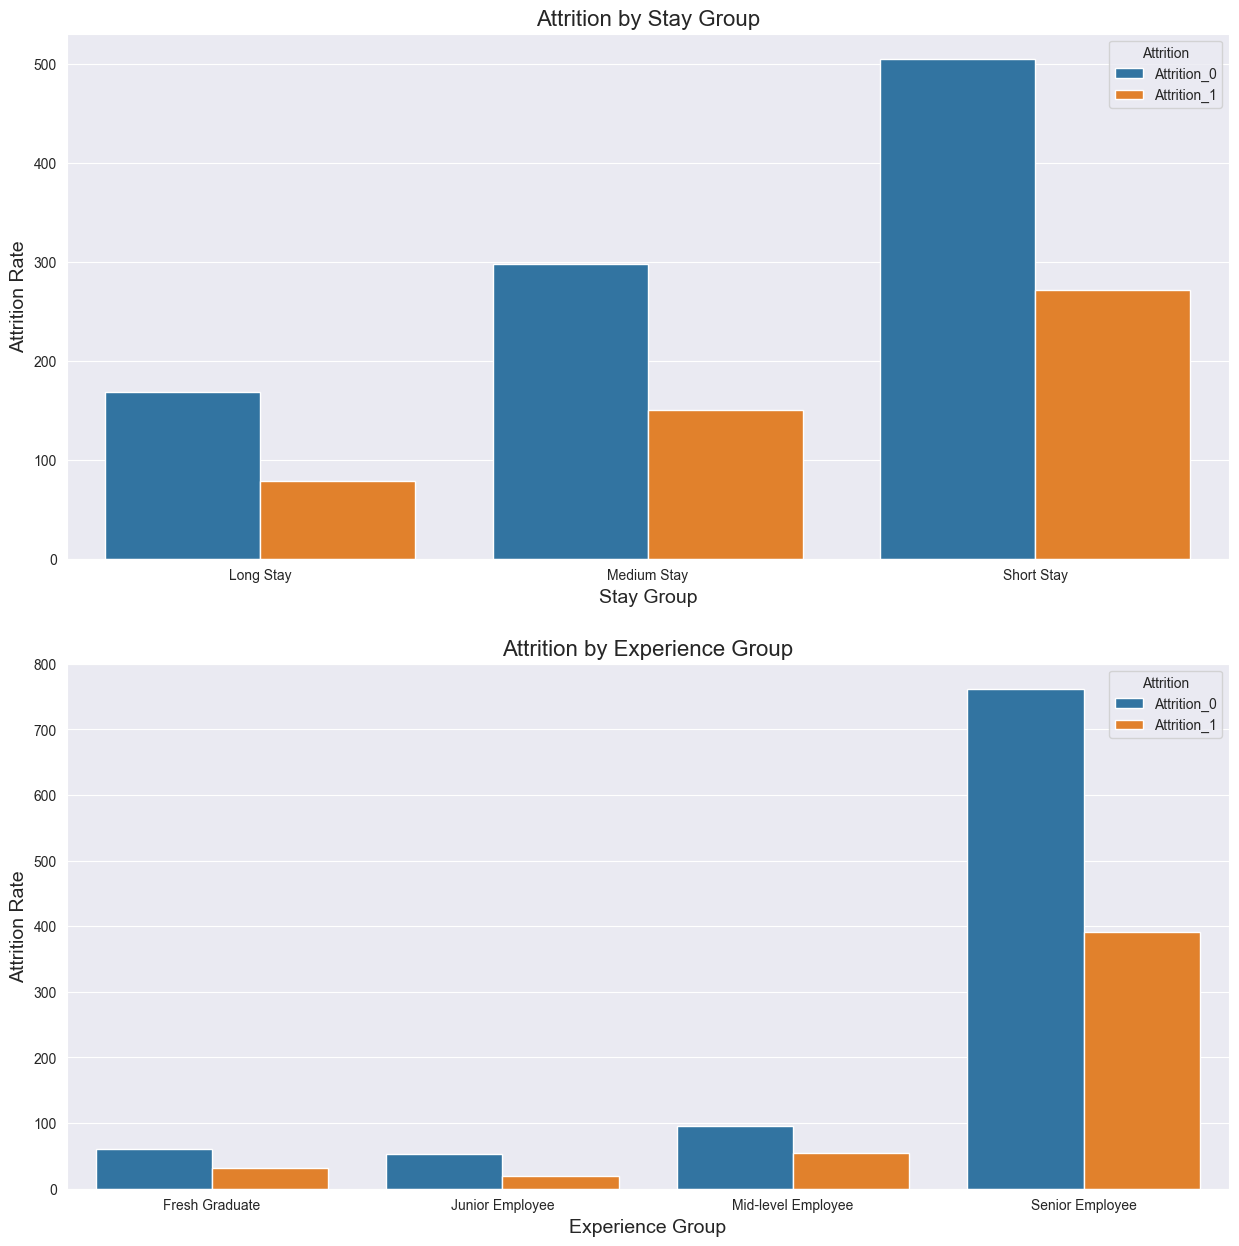

In [67]:
df_stay_melted = df_stay_grouped.melt(id_vars="StayGroup",
                                      value_vars=["Attrition_0", "Attrition_1"],
                                      var_name="Attrition",
                                      value_name="Value")

df_experience_melted = df_experience_grouped.melt(id_vars="ExperienceGroup",
                                                  value_vars=["Attrition_0", "Attrition_1"],
                                                  var_name="Attrition",
                                                  value_name="Value")

fig, (ax1, ax2) = plt.subplots(figsize=(15, 15), ncols=1, nrows=2)
sns.barplot(x="StayGroup", y="Value", hue="Attrition", data=df_stay_melted, ax=ax1)
ax1.set_title("Attrition by Stay Group", fontsize=16)
ax1.set_xlabel("Stay Group", fontsize=14)
ax1.set_ylabel("Attrition Rate", fontsize=14)

sns.barplot(x="ExperienceGroup", y="Value", hue="Attrition", data=df_experience_melted, ax=ax2)
ax2.set_title("Attrition by Experience Group", fontsize=16)
ax2.set_xlabel("Experience Group", fontsize=14)
ax2.set_ylabel("Attrition Rate", fontsize=14)
plt.show()

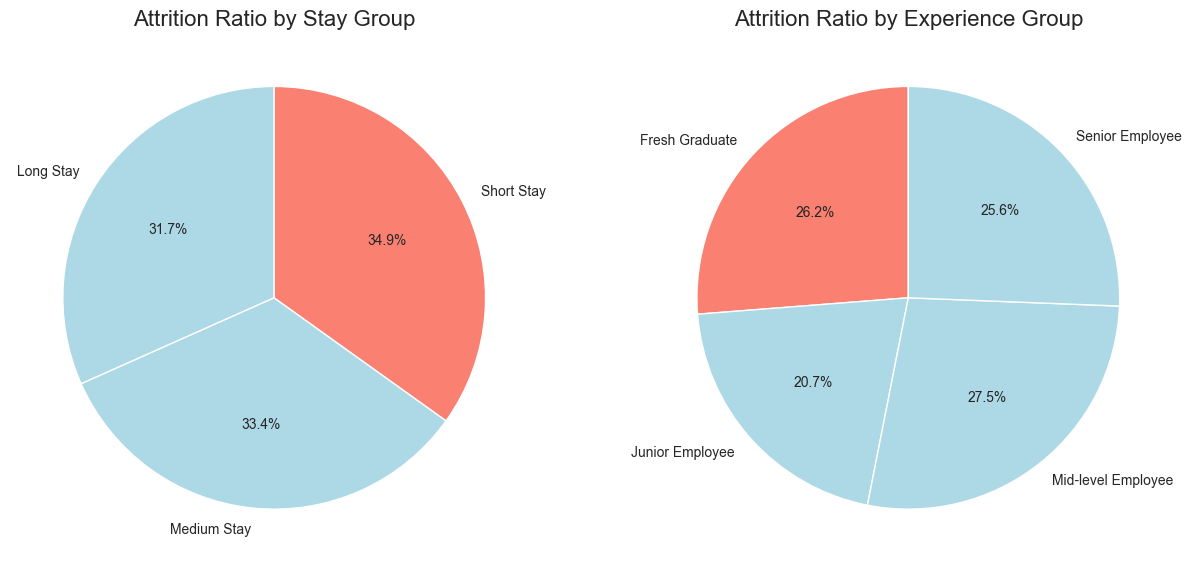

In [68]:
# Count of experience group and attrition
df_experience_ratio = df_experience_grouped.copy()
df_experience_ratio["Total"] = df_experience_ratio["Attrition_0"] + df_experience_ratio["Attrition_1"]
df_experience_ratio["Attrition_Ratio"] = df_experience_ratio["Attrition_1"] / df_experience_ratio["Total"]

# Count of stay and attrition
df_stay_ratio = df_stay_grouped.copy()
df_stay_ratio["Total"] = df_stay_ratio["Attrition_0"] + df_stay_ratio["Attrition_1"]
df_stay_ratio["Attrition_Ratio"] = df_stay_ratio["Attrition_1"] / df_stay_ratio["Total"]



# Visualisasi ratio attrition
experience_labels = df_experience_ratio["ExperienceGroup"]
stay_labels = df_stay_ratio["StayGroup"]
experience_ratios = df_experience_ratio["Attrition_Ratio"]
stay_ratios = df_stay_ratio["Attrition_Ratio"]

# Pie chart
fig, (ax1, ax2) = plt.subplots(figsize=(15, 15), ncols=2, nrows=1)
ax1.pie(stay_ratios, labels=stay_labels, autopct='%1.1f%%', startangle=90, colors=["lightblue", "lightblue", "salmon"])
ax1.set_title("Attrition Ratio by Stay Group", fontsize=16)

ax2.pie(experience_ratios, labels=experience_labels, autopct='%1.1f%%', startangle=90, colors=[ "salmon", "lightblue", "lightblue", "lightblue"])
ax2.set_title("Attrition Ratio by Experience Group", fontsize=16)
plt.show()

#### Insight
The data indicates that employees with short stay(tenure less than 5 years) and fresh graduates(experience less than 1 year) are more likely to leave (experience attrition) compared to other groups.
- to explain stay group:
1. Short Stay less than 5 years
2. Medium Stay less than 10 years
3. Long Stay more than 10 years

- to explain experience group:
1. Fresh Graduate has experiencing less than 1 year
2. Junior Employee has experiencing less than 3 years
3. Mid-level Employee has experiencing less than 5 years
4. Senior Employee has experiencing more than 5 years


In [69]:
df_experience_ratio.to_csv("data/df_experience_ratio.csv", index=False)
df_stay_ratio.to_csv("data/df_stay_ratio.csv", index=False)

## Bagaimana tingkat attrition bervariasi berdasarkan kenaikan gaji

In [70]:
df_exp["PercentSalaryHike"].describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

<Axes: >

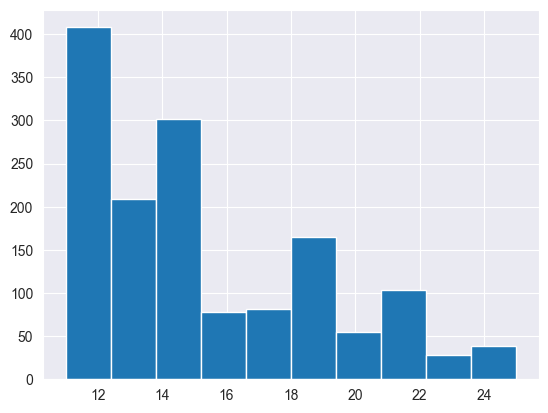

In [71]:
df_exp["PercentSalaryHike"].hist(bins=10)

In [72]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   object 
 1   Age                       1470 non-null   int64  
 2   Attrition                 1470 non-null   float64
 3   BusinessTravel            1470 non-null   int8   
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   int8   
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   int8   
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   int8   
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [73]:
df_exp.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,SalaryGroup,StayGroup,ExperienceGroup
0,1,38,0.0,1,1444,0,1,4,4,4,...,2,3,6,2,1,2,Middle Age,Low Salary,Medium Stay,Senior Employee
1,2,37,1.0,2,1141,1,11,2,3,1,...,2,1,1,0,0,0,Middle Age,Low Salary,Short Stay,Senior Employee
2,3,51,1.0,2,1323,1,4,4,1,1,...,2,4,10,0,2,7,Pre-retirement Age,Low Salary,Medium Stay,Senior Employee
3,4,42,0.0,1,555,2,26,3,2,3,...,2,4,20,4,4,8,Middle Age,Medium Salary,Long Stay,Senior Employee
4,5,40,0.0,2,1194,1,2,4,3,3,...,2,3,5,3,0,2,Middle Age,Low Salary,Short Stay,Senior Employee


In [74]:
df_exp["SalaryHike"] = df_exp["MonthlyIncome"] * (df_exp["PercentSalaryHike"] / 100)
df_exp[["EmployeeId", "Attrition", "SalaryHike"]]

,EmployeeId,Attrition,SalaryHike
0,1,0.0,329.01
1,2,1.0,716.55
2,3,1.0,295.32
3,4,0.0,1893.50
4,5,0.0,280.14
...,...,...,...
1465,1466,0.0,1100.54
1466,1467,0.0,1990.35
1467,1468,1.0,276.65
1468,1469,0.0,567.04


In [75]:
average_salary_growth = df_exp.groupby(["Attrition", "SalaryGroup"])["SalaryHike"].mean().reset_index()
average_salary_growth

,Attrition,SalaryGroup,SalaryHike
0,0.0,High Salary,2684.125196
1,0.0,Low Salary,609.679488
2,0.0,Medium Salary,1610.191297
3,1.0,High Salary,2772.560968
4,1.0,Low Salary,606.821707
5,1.0,Medium Salary,1557.297527


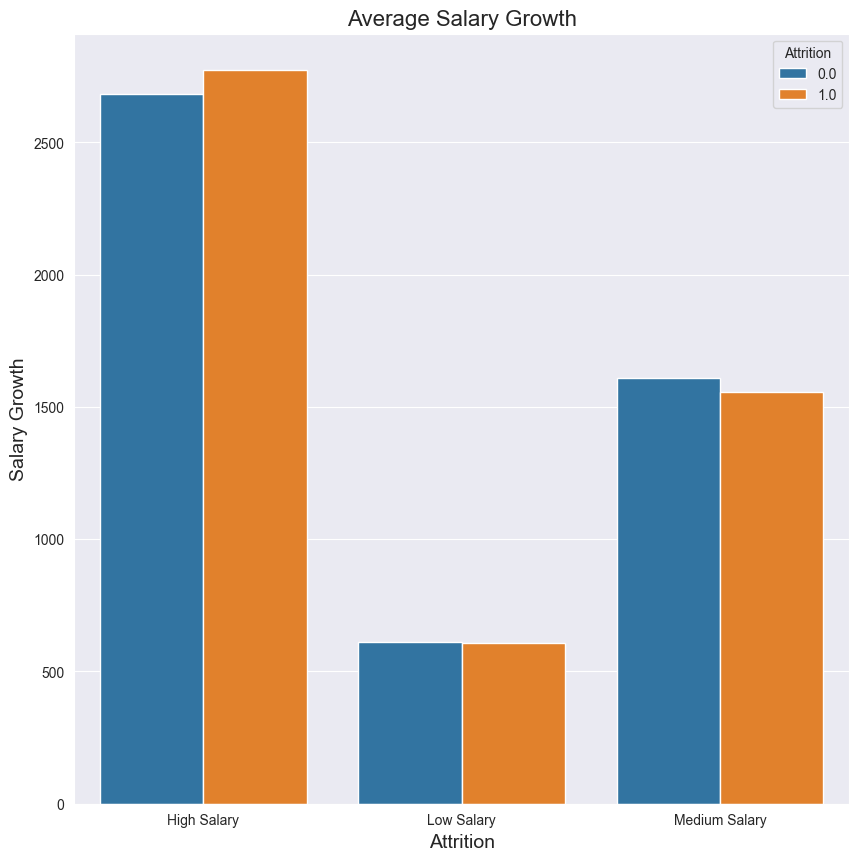

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=average_salary_growth, x="SalaryGroup", y="SalaryHike", hue="Attrition", ax=ax)
ax.set_title("Average Salary Growth", fontsize=16)
ax.set_xlabel("Attrition", fontsize=14)
ax.set_ylabel("Salary Growth", fontsize=14)
plt.show()

#### Insight
The data suggests that providing pay hikes alone may not be an effective strategy for reducing attrition

## Bagaimana tingkat attrition dipengaruhi oleh work life balance dan over time?

In [77]:
work_life_attrition = df_exp.groupby(["WorkLifeBalance", "Attrition"]).size().unstack().reset_index()
work_life_attrition.replace({ "WorkLifeBalance": {
    1 : "Low",
    2 : "Good",
    3 : "Excellent",
    4 : "Outstanding"
}}, inplace=True)

# Distribusi Overtime
overtime_attrition = df_exp.groupby(["OverTime", "Attrition"]).size().unstack().reset_index()
overtime_attrition.replace({ "OverTime": {
    0:"No",
    1:"Yes"
}}, inplace=True)


In [78]:
df_work_life_attrition_melt = work_life_attrition.melt(id_vars="WorkLifeBalance",
                                                       var_name="Attrition",
                                                       value_name="CountAttrition")
df_overtime_attrition_melt = overtime_attrition.melt(id_vars="OverTime",
                                                     var_name="Attrition",
                                                     value_name="CountAttrition")

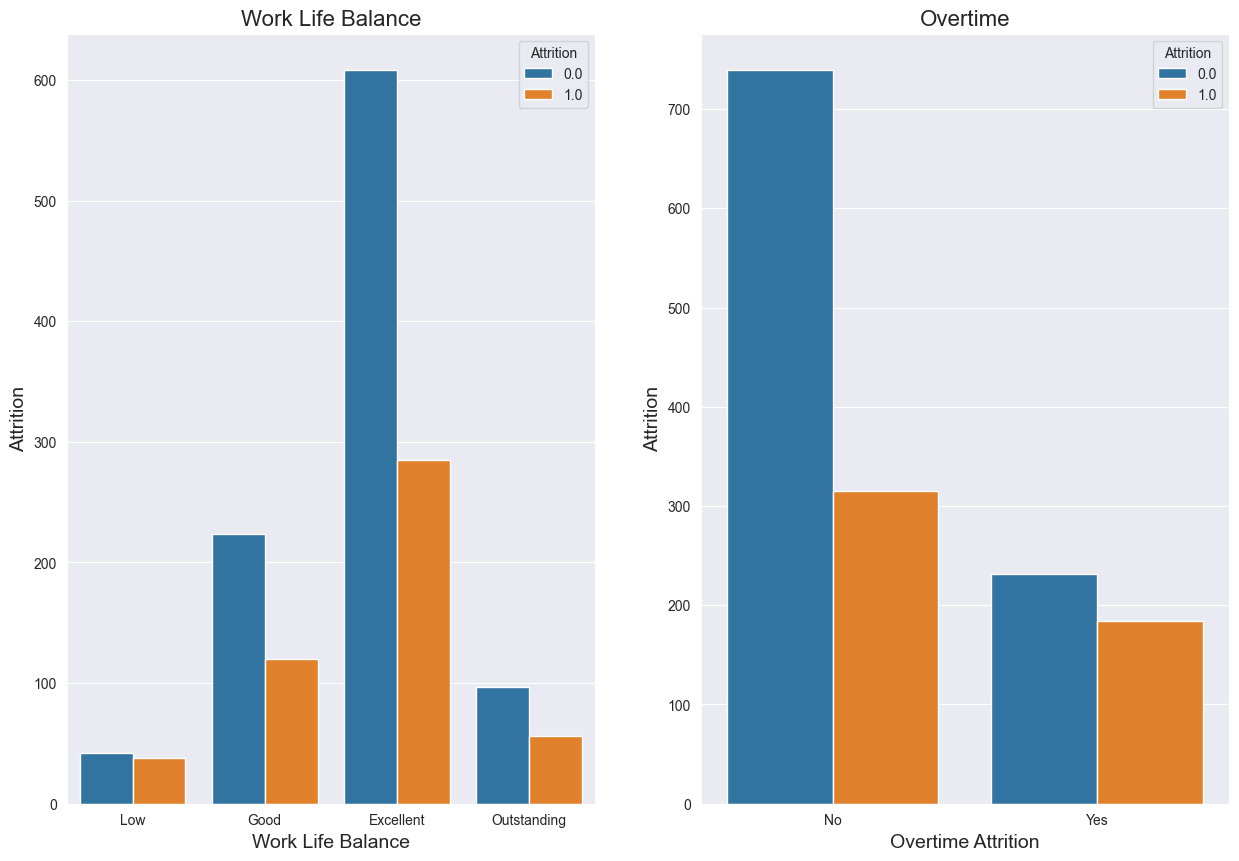

In [79]:
fig, (ax1, ax2) = plt.subplots(figsize=(15, 10), ncols=2, nrows=1)
sns.barplot(x="WorkLifeBalance", y="CountAttrition", hue="Attrition", data=df_work_life_attrition_melt, ax=ax1)
ax1.set_title("Work Life Balance", fontsize=16)
ax1.set_xlabel("Work Life Balance", fontsize=14)
ax1.set_ylabel("Attrition", fontsize=14)

sns.barplot(x="OverTime", y="CountAttrition", hue="Attrition", data=df_overtime_attrition_melt, ax=ax2)
ax2.set_title("Overtime", fontsize=16)
ax2.set_xlabel("Overtime Attrition", fontsize=14)
ax2.set_ylabel("Attrition", fontsize=14)
plt.show()


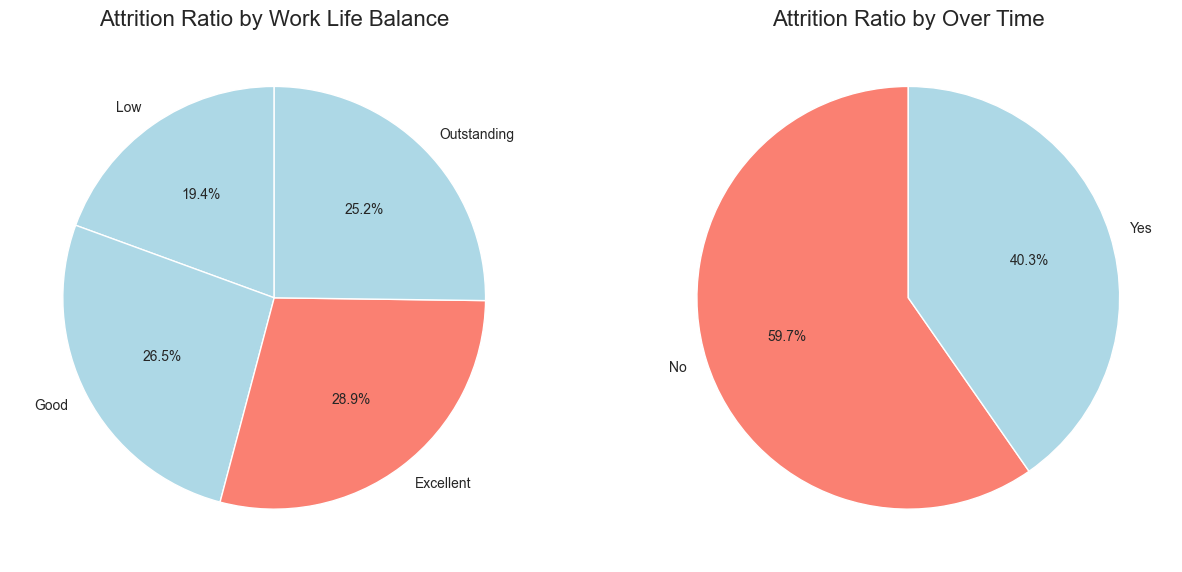

In [80]:
# count of work life balance and attrition base on work life balance
df_work_life_ratio = work_life_attrition.copy()
df_work_life_ratio["Total"] = df_work_life_ratio[0] + df_work_life_ratio[1]
df_work_life_ratio["Attrition_Ratio"] = df_work_life_ratio["Total"] / df_work_life_ratio[1]

# count of overtime and attrition base on overtime
df_overtime_ratio = overtime_attrition.copy()
df_overtime_ratio["Total"] = df_overtime_ratio[0] + df_overtime_ratio[1]
df_overtime_ratio["Attrition_Ratio"] = df_overtime_ratio["Total"] / df_overtime_ratio[1]

# Visualize
work_life_labels = df_work_life_ratio["WorkLifeBalance"]
overtime_labels = df_overtime_ratio["OverTime"]
work_life_ratios = df_work_life_ratio["Attrition_Ratio"]
overtime_ratios = df_overtime_ratio["Attrition_Ratio"]

fig, (ax1, ax2) = plt.subplots(figsize=(15, 10), ncols=2, nrows=1)
ax1.pie(work_life_ratios, labels=work_life_labels, autopct='%1.1f%%', startangle=90, colors=["lightblue", "lightblue", "salmon"])
ax1.set_title("Attrition Ratio by Work Life Balance", fontsize=16)

ax2.pie(overtime_ratios, labels=overtime_labels, autopct='%1.1f%%', startangle=90, colors=[ "salmon", "lightblue"])
ax2.set_title("Attrition Ratio by Over Time", fontsize=16)
plt.show()


#### Insight
The data indicates that employees with an excellent work-life balance who do not work overtime are more likely to leave compared to other groups.

In [81]:
df_work_life_ratio.to_csv("data/df_work_life_ratio.csv", index=False)
df_overtime_ratio.to_csv("data/df_overtime_ratio.csv", index=False)

## Apakah kelompok yang sudah menikah memiliki tingkat attrition yang lebih tinggi?

In [82]:
df_marital_status = df_exp.groupby("MaritalStatus").agg(
    Attrition_0=("Attrition", lambda x: (x==0).sum()),
    Attrition_1=("Attrition", lambda x: (x==1).sum())
).reset_index()

df_marital_status.replace({
    0: "Divorced",
    1: "Married",
    2: "Single",
}, inplace=True)
df_marital_status

,MaritalStatus,Attrition_0,Attrition_1
0,Divorced,248,79
1,Married,440,233
2,Single,283,187


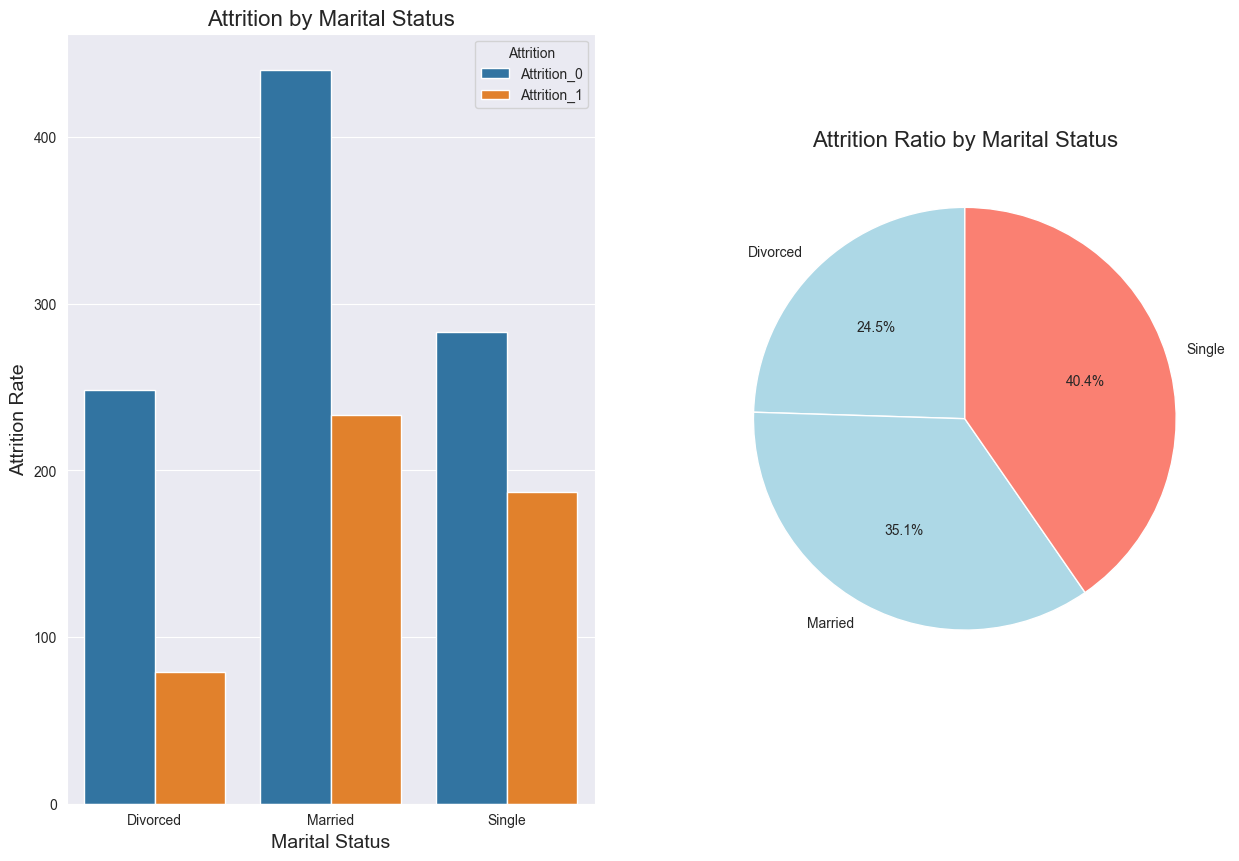

In [83]:
df_marital_status_melted = df_marital_status.melt(id_vars="MaritalStatus",
                                                  value_vars=["Attrition_0", "Attrition_1"],
                                                  var_name="Attrition",
                                                  value_name="Value")

# count of marital status and attrition base on marital status
df_marital_status_ratio = df_marital_status.copy()
df_marital_status_ratio["Total"] = df_marital_status_ratio["Attrition_0"] + df_marital_status_ratio["Attrition_1"]
df_marital_status_ratio["Attrition_Ratio"] = df_marital_status_ratio["Attrition_1"] / df_marital_status_ratio["Total"]

# label and total ratio
marital_status_labels = df_marital_status_ratio["MaritalStatus"]
marital_status_ratios = df_marital_status_ratio["Attrition_Ratio"]

fig, (ax1, ax2) = plt.subplots(figsize=(15, 10), nrows=1, ncols=2)
sns.barplot(x="MaritalStatus", y="Value", hue="Attrition", data=df_marital_status_melted, ax=ax1)
ax1.set_title("Attrition by Marital Status", fontsize=16)
ax1.set_xlabel("Marital Status", fontsize=14)
ax1.set_ylabel("Attrition Rate", fontsize=14)

ax2.pie(marital_status_ratios, labels=marital_status_labels, autopct='%1.1f%%', startangle=90, colors=["lightblue", "lightblue", "salmon"])
ax2.set_title("Attrition Ratio by Marital Status", fontsize=16)

plt.show()


### Insight
The data indicates that single employees are more likely to leave (attrition) compared to those who are married or divorced.

In [84]:
df_marital_status_ratio.to_csv("data/df_marital_status_ratio.csv", index=False)

In [85]:
df_exp.to_csv("data/df_exp.csv")

# Data Preprocessing

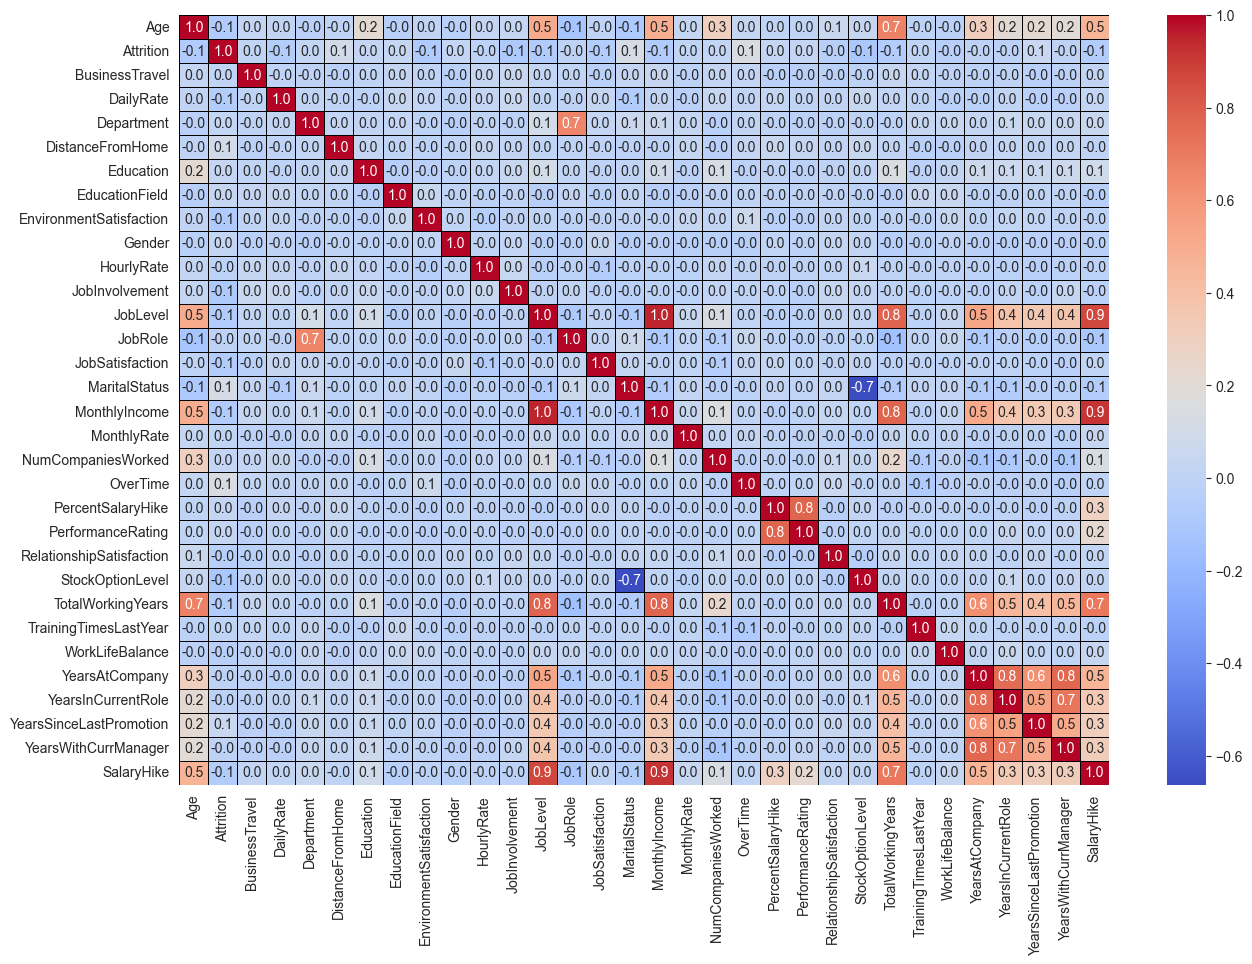

In [174]:
plt.subplots(figsize=(15, 10))
sns.heatmap(df_exp.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5, linecolor="black",
            fmt=".1f")
plt.show()

In [175]:
# Choosing colomns which will be made feature
df_pre = df_exp.copy()
df_pre = df_pre[["Gender", "AgeGroup", "SalaryGroup", "StayGroup", "ExperienceGroup", "Department", "WorkLifeBalance", "OverTime", "MaritalStatus", "YearsSinceLastPromotion", "Attrition"]]

df_pre.head()

,Gender,AgeGroup,SalaryGroup,StayGroup,ExperienceGroup,Department,WorkLifeBalance,OverTime,MaritalStatus,YearsSinceLastPromotion,Attrition
0,1,Middle Age,Low Salary,Medium Stay,Senior Employee,0,3,1,1,1,0.0
1,0,Middle Age,Low Salary,Short Stay,Senior Employee,1,1,0,1,0,1.0
2,1,Pre-retirement Age,Low Salary,Medium Stay,Senior Employee,1,4,1,1,2,1.0
3,0,Middle Age,Medium Salary,Long Stay,Senior Employee,2,4,0,1,4,0.0
4,0,Middle Age,Low Salary,Short Stay,Senior Employee,1,3,0,1,0,0.0


In [176]:
print(df_exp["ExperienceGroup"].value_counts())
print(df_pre["ExperienceGroup"].value_counts())

ExperienceGroup
Senior Employee       1154
Mid-level Employee     151
Fresh Graduate          92
Junior Employee         73
Name: count, dtype: int64
ExperienceGroup
Senior Employee       1154
Mid-level Employee     151
Fresh Graduate          92
Junior Employee         73
Name: count, dtype: int64


In [177]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   1470 non-null   int8   
 1   AgeGroup                 1470 non-null   object 
 2   SalaryGroup              1470 non-null   object 
 3   StayGroup                1470 non-null   object 
 4   ExperienceGroup          1470 non-null   object 
 5   Department               1470 non-null   int8   
 6   WorkLifeBalance          1470 non-null   int64  
 7   OverTime                 1470 non-null   int8   
 8   MaritalStatus            1470 non-null   int8   
 9   YearsSinceLastPromotion  1470 non-null   int64  
 10  Attrition                1470 non-null   float64
dtypes: float64(1), int64(2), int8(4), object(4)
memory usage: 86.3+ KB


In [178]:
# To convert dtype category to numeric
for column in df_pre.columns:
    if df_pre[column].dtype == "object" or df_pre[column].dtype == "category":
        df_pre[column] = df_pre[column].astype("category")
        df_pre[column] = df_pre[column].cat.codes

In [179]:
df_pre.head()

,Gender,AgeGroup,SalaryGroup,StayGroup,ExperienceGroup,Department,WorkLifeBalance,OverTime,MaritalStatus,YearsSinceLastPromotion,Attrition
0,1,1,1,1,3,0,3,1,1,1,0.0
1,0,1,1,2,3,1,1,0,1,0,1.0
2,1,2,1,1,3,1,4,1,1,2,1.0
3,0,1,2,0,3,2,4,0,1,4,0.0
4,0,1,1,2,3,1,3,0,1,0,0.0


In [180]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   1470 non-null   int8   
 1   AgeGroup                 1470 non-null   int8   
 2   SalaryGroup              1470 non-null   int8   
 3   StayGroup                1470 non-null   int8   
 4   ExperienceGroup          1470 non-null   int8   
 5   Department               1470 non-null   int8   
 6   WorkLifeBalance          1470 non-null   int64  
 7   OverTime                 1470 non-null   int8   
 8   MaritalStatus            1470 non-null   int8   
 9   YearsSinceLastPromotion  1470 non-null   int64  
 10  Attrition                1470 non-null   float64
dtypes: float64(1), int64(2), int8(8)
memory usage: 46.1 KB


In [181]:
# Split data train and test
X = df_pre.drop(columns=["Attrition"])
y = df_pre["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [182]:
# to do standard value data
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

In [195]:
dump(scaler, open("models/scaler.pkl", "wb"))

# Modeling

## KNN

In [184]:
# Define the models
knn = KNeighborsClassifier()

# Define the parameter grid for k
param_grid = {'n_neighbors': range(1, 31)}

# Initialize GridSearchCV
knn_grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit GridSearchCV
knn_grid_search.fit(X_train_standard, y_train)

# Get the best k value
best_k = knn_grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

Best k value: 8


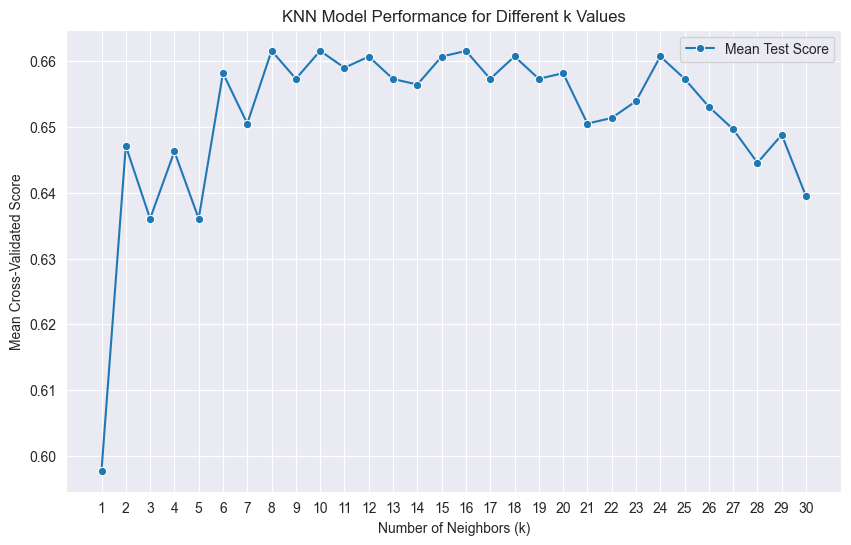

In [185]:
# Plotting the mean test scores for each k value
results = knn_grid_search.cv_results_
plt.figure(figsize=(10, 6))
sns.lineplot(x=param_grid['n_neighbors'], y=results['mean_test_score'], marker='o', label='Mean Test Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Score')
plt.title('KNN Model Performance for Different k Values')
plt.xticks(param_grid['n_neighbors'])
plt.grid(True)
plt.legend()
plt.show()

In [186]:
# Test score
test_score_knn = knn_grid_search.score(X_test_standard, y_test)
print(f"Test score for KNN:{test_score_knn}")

Test score for KNN:0.6938775510204082


## SVC

In [187]:
# Define the SVC models
svc = SVC()

# Define the parameter grid for C and gamma
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

# Initialize GridSearchCV
svc_grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit GridSearchCV
svc_grid_search.fit(X_train_standard, y_train)

# Get the best parameters
best_params = svc_grid_search.best_params_
print(f"Best parameters for SVC: {best_params}")

# Test Score
test_score_svc = svc_grid_search.score(X_test_standard, y_test)
print(f"Test score for SVC: {test_score_svc}")

Best parameters for SVC: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Test score for SVC: 0.6972789115646258


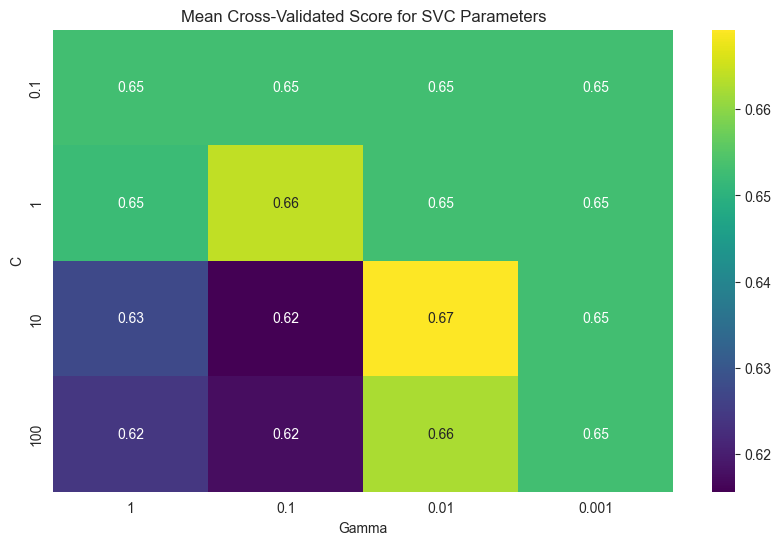

In [188]:
# Plotting the mean test scores for each parameter combination
results = svc_grid_search.cv_results_
plt.figure(figsize=(10, 6))
scores = results['mean_test_score']
params = svc_grid_search.cv_results_['params']
score_matrix = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

sns.heatmap(score_matrix, annot=True, cmap="viridis", xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Mean Cross-Validated Score for SVC Parameters')
plt.show()

## RandomForest

In [189]:
# Initialize the RandomForest models
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for RandomForest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV for RandomForest
rf_grid_search = GridSearchCV(rf_model, param_grid_rf, cv=5)

# Fit GridSearchCV
rf_grid_search.fit(X_train_standard, y_train)

# Get the best parameters
best_params_rf = rf_grid_search.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

# Test Score
test_score_rf = rf_grid_search.score(X_test_standard, y_test)
print(f"Train score for Random Forest: {test_score_rf}")

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
Train score for Random Forest: 0.6700680272108843


## Naive Bayes

In [190]:
# Initialize Naive Bayes models
nb_model = GaussianNB()

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Initialize GridSearchCV for Naive Bayes
nb_grid_search = GridSearchCV(nb_model, param_grid_nb, cv=5)

# Fit GridSearchCV
nb_grid_search.fit(X_train_standard, y_train)

# Get the best parameters
best_params_nb = nb_grid_search.best_params_
print(f"Best parameters for Naive Bayes: {best_params_nb}")

# Test Score
test_score_nb = nb_grid_search.score(X_test_standard, y_test)
print(f"Test score for Naive Bayes: {test_score_nb}")

Best parameters for Naive Bayes: {'var_smoothing': 0.15199110829529336}
Test score for Naive Bayes: 0.6632653061224489


# Evaluation

In [191]:
# Initialize models and train
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train_standard, y_train)

# Score models
train_score_nb = model.score(X_train_standard, y_train)
test_score_nb = model.score(X_test_standard, y_test)

print(f"Train score for Naive Bayes: {train_score_nb}")
print(f"Test score for Naive Bayes: {test_score_nb}")

Train score for Naive Bayes: 0.7202380952380952
Test score for Naive Bayes: 0.6938775510204082


In [192]:
y_predict = model.predict(X_test_standard)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.72      0.90      0.80       203
         1.0       0.51      0.23      0.32        91

    accuracy                           0.69       294
   macro avg       0.62      0.57      0.56       294
weighted avg       0.66      0.69      0.65       294



In [196]:
dump(model, open("models/model_knn.pkl", "wb"))

Model deploy: <a href="https://human-resource-problem-analysis-jcjgcvxckb2f32ewqfhryg.streamlit.app/">Link Streamlit</a>

# Conclusion
1. Do certain age groups have higher attrition rates?
- From the analysis, it is observed that employees in the early-career age group and middle-aged group tend to have higher attrition rates compared to other age groups. This indicates that younger employees and those in their mid-career stages might face challenges or dissatisfaction that leads them to leave the organization.
2. How do attrition rates vary by gender?
- The data shows that male employees have a higher attrition rate compared to female employees. This indicates that male employees may face different challenges or dissatisfaction leading to their departure
3. Which department has the highest attrition rate?
- The data shows that the Research & Development department has slightly lower attrition compared to the Human Resources and Sales departments. However, the differences are relatively small.
4. Are attrition rates higher among employees with lower salaries?
- The data indicates that employees with low salaries have a higher likelihood of leaving (attrition) compared to those with medium or high salaries.
5. How long does the average employee stay at a company before they experience attrition?
- The data indicates that employees with short stay(tenure less than 5 years) and fresh graduates(experience less than 1 year) are more likely to leave (experience attrition) compared to other groups.
6. How attrition rates vary based on salary increases or bonuses
- The data suggests that providing pay hikes alone may not be an effective strategy for reducing attrition
7. How is attrition rate affected by average work hours?
- The data indicates that employees with an excellent work-life balance who do not work overtime are more likely to leave compared to other groups.
8. Does the married group have a higher attrition rate?
- The data indicates that single employees are more likely to leave (attrition) compared to those who are married or divorced.
9. How can we predict which employees will potentially leave in the future?
- By using the ml model we can predict which employees will leave

To reduce attrition rates, organizations need to focus on retention of young and mid-career employees through career development programs and needs surveys. Improve men's work experience with better work-life balance policies, as well as special attention to HR and Sales departments with performance-based incentives and workload management. Low salaries as a trigger for attrition can be overcome by offering competitive compensation and reward programs. Extending employee tenure through effective onboarding and clear career plans is also important. Apart from that, salary increases alone are not enough, so a holistic approach is needed that involves career development and work welfare. For work-life balance, ensure appreciation for employee contributions is maintained. Lastly, increase social connectedness for single employees through social activities and flexible work policies. This integrated approach will create a work environment that supports and reduces attrition levels.
